In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt


In [4]:
import os
train_folder = 'data/train'
test_folder = 'data/test'

def convert_sample(path):
    return np.load(os.path.join(path,'fnc.npy')), np.load(os.path.join(path,'icn_tc.npy'))


def get_train_set():
    fnc_list = []
    icn_tc_list = []
    targets = []
    for folder in os.listdir(train_folder):
        for sample in os.listdir(os.path.join(train_folder,folder)):
            fnc, icn_tc = convert_sample(os.path.join(train_folder,folder,sample))
            fnc_list.append(fnc.reshape(5460))
            icn_tc_list.append(icn_tc)
            targets.append(1 if folder=="BP" else 0)

    return fnc_list, icn_tc_list, targets

def get_test_set():
    fnc_list = []
    icn_tc_list = []
    names = []
    for folder in os.listdir(test_folder):
        fnc, icn_tc = convert_sample(os.path.join(test_folder,folder))
        fnc_list.append(fnc.reshape(5460))
        icn_tc_list.append(icn_tc)
        names.append(folder)
        
    return fnc_list, icn_tc_list, names



In [5]:
train_fnc, train_icn_tc, train_targets = get_train_set()
test_fnc, test_icn_tc, names = get_test_set()

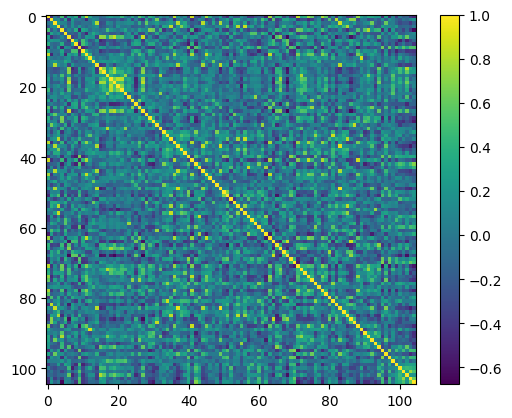

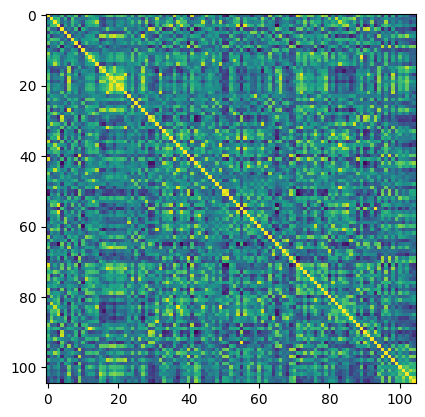

In [6]:
mat = np.ones((105,105))

upper = np.triu(mat, k=1)
mat[np.nonzero(upper)] = train_fnc[0]

mat[mat==1]=0

mat = mat + mat.T
np.fill_diagonal(mat,1)

map = plt.imshow(mat)
plt.colorbar(map)
plt.show()

cov = np.cov(train_icn_tc[0], rowvar=False)
cov = cov/cov.max()

plt.imshow(cov)

PearsonRResult(statistic=-0.22682454805698452, pvalue=0.00840063013524412)


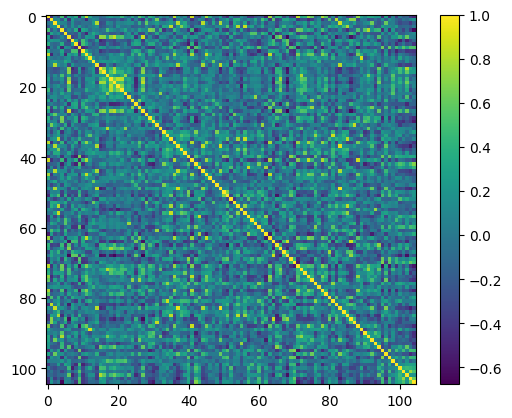

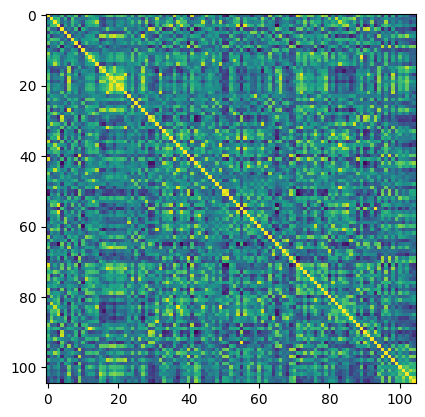

In [7]:
from scipy import stats
print(stats.pearsonr(train_icn_tc[0][:,0],train_icn_tc[0][:,1]))
mat = np.ones((105,105))

upper = np.triu(mat, k=1)
mat[np.nonzero(upper)] = train_fnc[0]

mat[mat==1]=0

mat = mat + mat.T
np.fill_diagonal(mat,1)

map = plt.imshow(mat)
plt.colorbar(map)
plt.show()


up = np.triu(np.corrcoef(train_icn_tc[0], rowvar=False), k=1)
corr = up + up.T
np.fill_diagonal(corr, 1)
plt.imshow(corr)
plt.show()
